In [19]:
import pandas as pd

# Cargar el archivo pickle en un DataFrame
df_movies = pd.read_pickle('../Datasets/Datasets_cleaned_ETL/movi_cleaned/df_movies.pkl')


In [20]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22998 entries, 0 to 22997
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   movieId        22998 non-null  object        
 1   plataforma     22998 non-null  category      
 2   type           22998 non-null  category      
 3   title          22998 non-null  object        
 4   director       22998 non-null  object        
 5   cast           22998 non-null  object        
 6   country        22998 non-null  object        
 7   date_added     22998 non-null  datetime64[ns]
 8   release_year   22998 non-null  int64         
 9   rating         22998 non-null  category      
 10  duration_int   22998 non-null  int64         
 11  duration_type  22998 non-null  object        
 12  listed_in      22998 non-null  category      
 13  description    22998 non-null  object        
dtypes: category(4), datetime64[ns](1), int64(2), object(7)
memory usage: 1

In [21]:
df_movies.tail(5)

,movieId,plataforma,type,title,director,cast,country,date_added,release_year,rating,duration_int,duration_type,listed_in,description
22993,ns8803,netflix,movie,zodiac,david fincher,"mark ruffalo, jake gyllenhaal, robert downey j...",united states,2019-11-20,2007,r,158,min,"cult movies, dramas, thrillers","a political cartoonist, a crime reporter and a..."
22994,ns8804,netflix,tv show,zombie dumb,unknown,unknown,unknown,2019-07-01,2018,tv-y7,2,seasons,"kids' tv, korean tv shows, tv comedies","while living alone in a spooky town, a young g..."
22995,ns8805,netflix,movie,zombieland,ruben fleischer,"jesse eisenberg, woody harrelson, emma stone, ...",united states,2019-11-01,2009,r,88,min,"comedies, horror movies",looking to survive in a world taken over by zo...
22996,ns8806,netflix,movie,zoom,peter hewitt,"tim allen, courteney cox, chevy chase, kate ma...",united states,2020-01-11,2006,pg,88,min,"children & family movies, comedies","dragged from civilian life, a former superhero..."
22997,ns8807,netflix,movie,zubaan,mozez singh,"vicky kaushal, sarah-jane dias, raaghav chanan...",india,2019-03-02,2015,tv-14,111,min,"dramas, international movies, music & musicals",a scrappy but poor boy worms his way into a ty...


________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

In [22]:
# Cargar el archivo pickle en un DataFrame
df_gby_movieid = pd.read_pickle('../Datasets/Datasets_cleaned_ETL/movi_cleaned/df_ratings_gby_movies.pkl')


In [23]:
df_gby_movieid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22998 entries, 0 to 22997
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   movieId      22998 non-null  object 
 1   userId       22998 non-null  object 
 2   rating       22998 non-null  object 
 3   prom_rating  22998 non-null  float64
dtypes: float64(1), object(3)
memory usage: 718.8+ KB


In [24]:
df_gby_movieid.tail(5)

,movieId,userId,rating,prom_rating
22993,ns995,"[108610, 108927, 108965, 109074, 109229, 10943...","[3.0, 5.0, 4.0, 3.0, 1.0, 3.0, 4.0, 4.5, 3.0, ...",3.436508
22994,ns996,"[108423, 108739, 108757, 108804, 109041, 10919...","[2.0, 3.0, 4.0, 3.0, 4.0, 4.5, 4.0, 5.0, 4.0, ...",3.615942
22995,ns997,"[109016, 109414, 109519, 109709, 110150, 11022...","[4.0, 3.5, 3.5, 3.5, 4.0, 4.5, 4.0, 4.5, 1.0, ...",3.655738
22996,ns998,"[109112, 109478, 109943, 110052, 110183, 11048...","[4.0, 4.0, 5.0, 4.0, 5.0, 3.0, 0.5, 4.0, 3.0, ...",3.541096
22997,ns999,"[108560, 108933, 109539, 109873, 110269, 11048...","[4.0, 4.0, 4.0, 5.0, 2.0, 4.0, 1.5, 2.5, 2.0, ...",3.578571


# Ahora hago join de ambos por movie id:

In [27]:
# Realizar el inner join
df_merged = df_movies.merge(df_gby_movieid, on='movieId', how='inner')


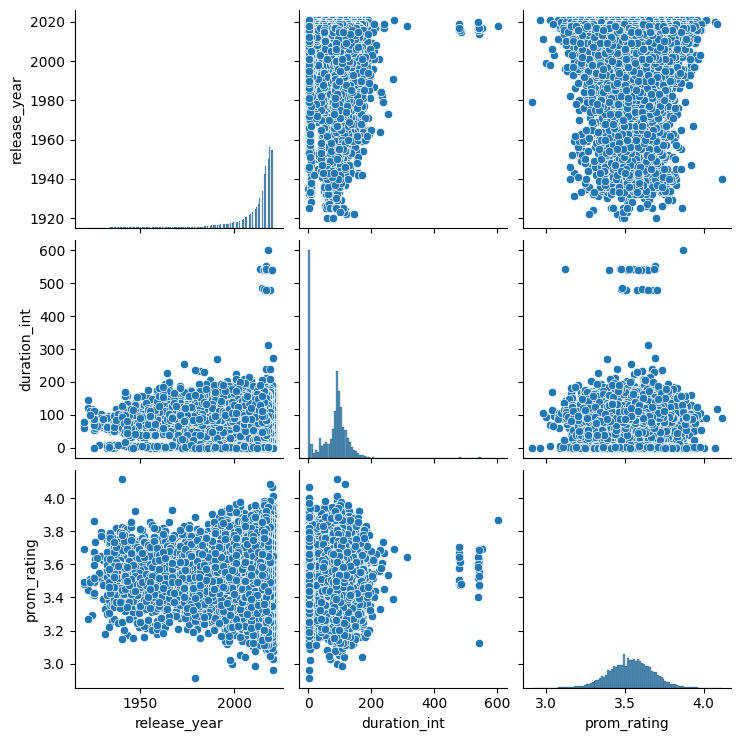

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear pairplot
sns.pairplot(df_merged)

# Mostrar el gráfico
plt.show()


In [32]:
df_merged.tail()

,movieId,plataforma,type,title,director,cast,country,date_added,release_year,rating_x,duration_int,duration_type,listed_in,description,userId,rating_y,prom_rating
22993,ns8803,netflix,movie,zodiac,david fincher,"mark ruffalo, jake gyllenhaal, robert downey j...",united states,2019-11-20,2007,r,158,min,"cult movies, dramas, thrillers","a political cartoonist, a crime reporter and a...","[108658, 108688, 108978, 110024, 110893, 11091...","[3.0, 2.5, 2.0, 5.0, 5.0, 2.0, 5.0, 4.5, 3.5, ...",3.298387
22994,ns8804,netflix,tv show,zombie dumb,unknown,unknown,unknown,2019-07-01,2018,tv-y7,2,seasons,"kids' tv, korean tv shows, tv comedies","while living alone in a spooky town, a young g...","[108637, 108736, 108924, 109355, 109739, 10983...","[4.0, 2.0, 3.5, 5.0, 4.5, 0.5, 4.0, 4.5, 3.5, ...",3.438462
22995,ns8805,netflix,movie,zombieland,ruben fleischer,"jesse eisenberg, woody harrelson, emma stone, ...",united states,2019-11-01,2009,r,88,min,"comedies, horror movies",looking to survive in a world taken over by zo...,"[108699, 109170, 109404, 109426, 109800, 10985...","[5.0, 5.0, 3.0, 2.0, 4.0, 5.0, 5.0, 4.5, 2.0, ...",3.388889
22996,ns8806,netflix,movie,zoom,peter hewitt,"tim allen, courteney cox, chevy chase, kate ma...",united states,2020-01-11,2006,pg,88,min,"children & family movies, comedies","dragged from civilian life, a former superhero...","[108652, 109197, 109253, 109327, 109439, 10958...","[3.0, 4.5, 1.0, 4.5, 2.0, 3.5, 3.0, 5.0, 1.0, ...",3.500000
22997,ns8807,netflix,movie,zubaan,mozez singh,"vicky kaushal, sarah-jane dias, raaghav chanan...",india,2019-03-02,2015,tv-14,111,min,"dramas, international movies, music & musicals",a scrappy but poor boy worms his way into a ty...,"[108478, 108513, 108519, 108793, 108924, 10966...","[4.0, 5.0, 4.0, 3.0, 4.0, 3.0, 4.0, 4.5, 4.0, ...",3.581967


In [33]:

import os

# Ruta del archivo pickle
pickle_file = '../Datasets/Datasets_cleaned_ETL/movi_cleaned/df_merged.pkl'

# Verificar si el archivo existe
if os.path.exists(pickle_file):
    # Eliminar el archivo existente
    os.remove(pickle_file)

# Guardar el dataframe como archivo pickle
df_gby_movieid.to_pickle(pickle_file)
